In [1]:
import sys
sys.path.append("/home/emperornao/p/perception")

In [711]:
from dataset.cadc import CadcDataset
import numpy as np

dataset_path = "/home/emperornao/p/perception/data/cadc"
scene_sample = None
i = 0
for scene in CadcDataset.lazy_create_from_path(dataset_path):
    scene_sample = scene
    break
assert scene_sample is not None

In [695]:
from viz.bev import create_empty_bev, draw_pcl_on_bev, save_image

In [696]:
import cv2
from dataset import LidarCloud, BBox
from geometry.transformations import rotate_points_2d
from typing import List

In [751]:

def draw_pcl_on_bev(
        image: np.array,
        pcl: LidarCloud,
        scene_size: List[int],
        points_colors: np.array = None,
) -> np.array:

    points = pcl.xyz
    image_size = list(image.shape[:2])
    if points_colors is None:
        points_colors = np.zeros([points.shape[0], 3], dtype=np.int8)
        points_colors.fill(255)

    active_points_indexes = np.logical_and(
        np.abs(points[:, 0]) < scene_size[0],
        np.abs(points[:, 1]) < scene_size[1],
    )
    filtered_points = points[active_points_indexes]
    points_colors = points_colors[active_points_indexes]

    w_step = 2 * scene_size[0] / image_size[0]
    h_step = 2 * scene_size[1] / image_size[1]
    y = 999 - np.floor((filtered_points[:, 1] + scene_size[0]) / w_step).astype(np.int32)
    # x = image_size[0] - 1 - np.floor((filtered_points[:, 1] + scene_size[1]) / h_step).astype(np.int32)
    # y = np.floor((filtered_points[:, 1] + scene_size[0]) / w_step).astype(np.int32)
    x = 999 - np.floor((filtered_points[:, 0] + scene_size[1]) / h_step).astype(np.int32)    

    coords = np.vstack([x, y]).T

    for (x, y), color in zip(coords, points_colors):
        image[y, x, :] = color

    return image

In [738]:
#!pip install scipy

In [743]:
from scipy.spatial.transform import Rotation as R

In [752]:
def draw_bboxes_on_bev(
        image: np.array,
        bboxes: List[BBox],
        scene_size: List[int],
        boxes_colors: np.array = None,
) -> np.array:

    image = np.copy(image)
    image_size = list(image.shape[:2])

    cx = np.array(list(map(lambda x: x.cx, bboxes)))
    cy = np.array(list(map(lambda x: x.cy, bboxes)))
    dx = np.array(list(map(lambda x: x.dx, bboxes)))
    dy = np.array(list(map(lambda x: x.dy, bboxes)))
    yaw = np.array(list(map(lambda x: x.yaw, bboxes)))

    # points = []
    # for box in bboxes:
    #     print(bbox)
    #     T_Lidar_Cuboid = np.eye(4);  # identify matrix
    #     T_Lidar_Cuboid[0:3, 0:3] = R.from_euler('z', -box.yaw,
    #                                         degrees=False).as_matrix();  # rotate the identity matrix
    #     T_Lidar_Cuboid[0][3] = box.cx
    #     T_Lidar_Cuboid[1][3] = box.cy
    #     T_Lidar_Cuboid[2][3] = box.cz

    #     dx = box.dx
    #     dy = box.dy
    #     dz = box.dz


    #     front_right_top = np.array(
    #         [[1, 0, 0, dy], [0, 1, 0, dx], [0, 0, 1, dz], [0, 0, 0, 1]]);
    
    #     front_left_top = np.array(
    #         [[1, 0, 0, dy], [0, 1, 0, -dx], [0, 0, 1, dz], [0, 0, 0, 1]]);
    
    
    #     back_right_top = np.array(
    #         [[1, 0, 0, -dy], [0, 1, 0, dx], [0, 0, 1, dz], [0, 0, 0, 1]]);
    
    #     back_left_top = np.array(
    #         [[1, 0, 0, -dy], [0, 1, 0, -dx], [0, 0, 1, dz / 2], [0, 0, 0, 1]]);  

    #     f_r_t =  np.matmul(T_Lidar_Cuboid, front_right_top)
    #     f_l_t  = np.matmul(T_Lidar_Cuboid, front_left_top)
    #     b_r_t  = np.matmul(T_Lidar_Cuboid, back_right_top)
    #     b_l_t = np.matmul(T_Lidar_Cuboid, back_left_top)

    #     points.append([
    #         [f_r_t[0][3], f_r_t[1][3]],
    #         [f_l_t[0][3], f_l_t[1][3]],
    #         [b_r_t[0][3], b_r_t[1][3]],
    #         [b_l_t[0][3], b_l_t[1][3]],
    #     ])

    # points = np.array(points)
    
    # # new_d = rotate_points_2d(np.array([[-dx, -dy], [-dx, dy], [dx, dy], [dx, -dy]]).transpose(2, 0, 1), 0 + yaw - yaw)
    # # rotated_boxes = new_d + np.expand_dims(np.array([cx, cy]), 0).transpose(2, 0, 1)
    # # rotated_boxes = np.array([bbox.vertices_2d for bbox in bboxes])

    # print(points.shape)
    # w_step = 2 * scene_size[0] / image_size[0]
    # h_step = 2 * scene_size[1] / image_size[1]
    # print(scene_size, image_size)

    # # we are swapping axis
    # y = image_size[1] -1 - np.floor((points[:,:, 1] + scene_size[0]) / w_step).astype(np.int32)
    # x = np.floor((points[:,:, 0] + scene_size[1]) / h_step).astype(np.int32)
    # # x = np.floor((rotated_boxes[:, :, 1] + scene_size[1]) / w_step).astype(np.int32)
    # # y = np.floor((rotated_boxes[:, :, 0] + scene_size[0]) / h_step).astype(np.int32)
    # print( x[0, :], y[0, :])
    # coords = np.stack([x.reshape(-1), y.reshape(-1)], axis=1).reshape(-1, 4, 2)
    # print(coords[0])

    # for points in coords:
    #     print(points)
    #     all_ps = np.append(points, points[0]).reshape(5, 2)
    #     print(all_ps)
    #     image = image
    #     image = cv2.line(image, all_ps[0], all_ps[1], (0, 255, 0), thickness=1)
    #     image = cv2.line(image, all_ps[1], all_ps[2], (255, 255, 0), thickness=1)
    #     image = cv2.line(image, all_ps[2], all_ps[3], (0, 255, 255), thickness=1)
    #     image = cv2.line(image, all_ps[3], all_ps[4], (0, 0, 255), thickness=1)

    # # return image

    w_step = 2 * scene_size[0] / image_size[0]
    h_step = 2 * scene_size[1] / image_size[1]
    y = 999 - np.floor((cy + scene_size[1]) / w_step).astype(np.int32)
    x = 999 - np.floor((cx + scene_size[0]) / h_step).astype(np.int32)
    print(y[0:10], x[0:10])
    coords = np.vstack([x, y]).T
    coords = (coords)# @ np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])).astype(np.int32)
    
    for (x, y) in coords:
        if x > 0 and x < image_size[0] and y > 0 and y < image_size[1]:
            # image[y, x, :] = np.array([255, 0, 0])
            # points = [[x - 3, y - 3],
            #           [x - 3, y + 3],
            #           [x + 3, y + 3],
            #           [x + 3, y - 3],
            #           [x - 3, y - 3]
            #          ]
            # for index in range(4):
            image[y + 0, x + 0, :] = np.array([255, 0, 0])
            image[y + 0, x + 1, :] = np.array([255, 0, 0])
            image[y + 0, x + 2, :] = np.array([255, 0, 0])
            image[y + 1, x + 0, :] = np.array([255, 0, 0])
            image[y + 1, x + 1, :] = np.array([255, 0, 0])
            image[y + 1, x + 2, :] = np.array([255, 0, 0])
            image[y + 2, x + 0, :] = np.array([255, 0, 0])
            image[y + 2, x + 1, :] = np.array([255, 0, 0])
            image[y + 2, x + 2, :] = np.array([255, 0, 0])                
                # image[y, x, :] = np.array([255, 0, 0])
                # image = cv2.line(image, points[index][::-1], points[index + 1][::-1], (0, 0, 255), thickness=1)
                # image[y, x, :] = np.array([255, 0, 0])
        

    return image


In [753]:
empty_image = create_empty_bev([1000, 1000])
bev_image = draw_pcl_on_bev(empty_image, scene_sample.lidar_cloud, [50, 50])
boxes_image = draw_bboxes_on_bev(bev_image, scene_sample.gt3d.boxes, [50, 50])

[ 640  816  842  875  904  933  963  993 1020 1051] [504 500 491 497 494 495 494 501 501 501]


/tmp/ipykernel_457233/4039178924.py:12: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 255 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  points_colors.fill(255)


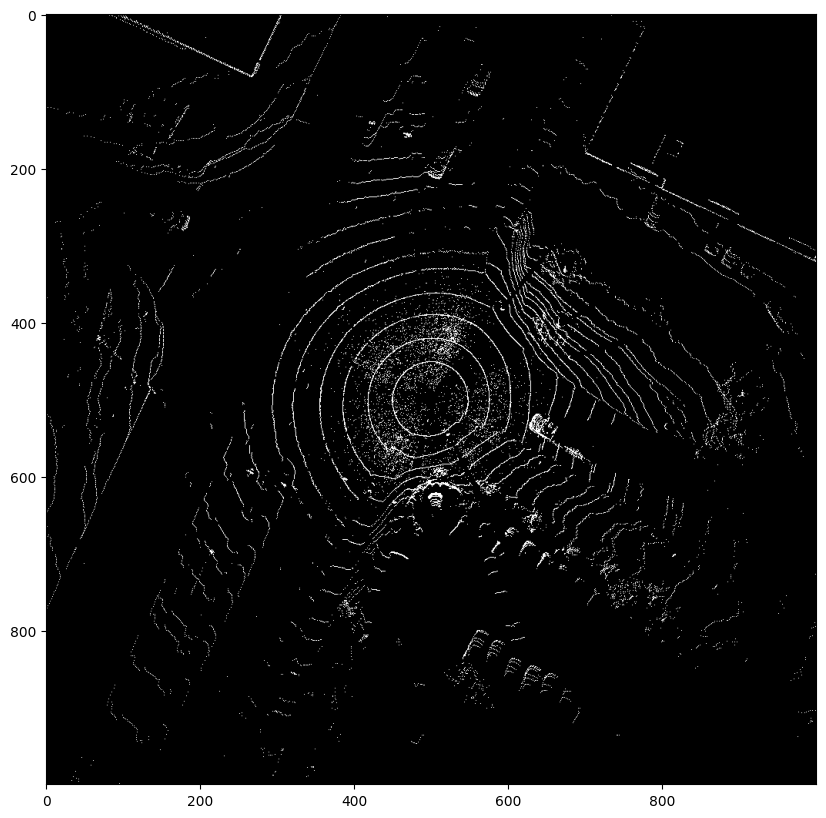

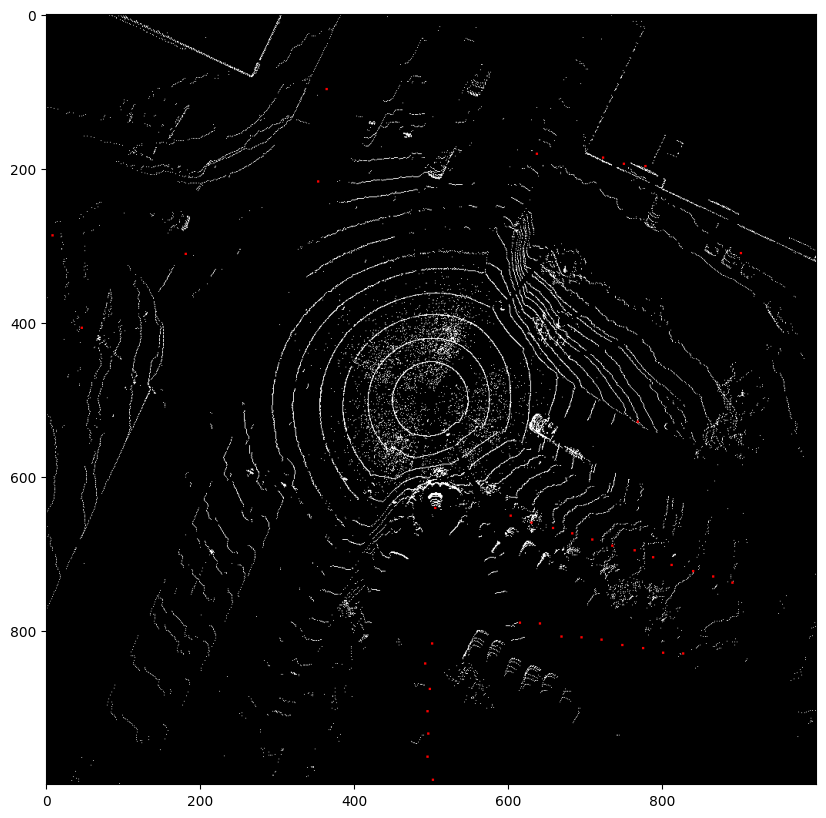

In [754]:
plt.figure(figsize=(10, 10))
plt.imshow(bev_image)
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(boxes_image)
plt.show()